<p style="font-size:15pt; text-align:center">
    Introduction to Data Science
</p>
<p style="font-size:20pt; text-align:center">
    Distributions
</p>
<p style="font-size:20pt; text-align:center">
主要是绘制分布相关的图像，还没认真看过，结合matplotlib看

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Loading a data set and initial data analysis

This data set contains gender, height [inches，1 inch = 2.54 cm], and weight [pounds, 1 pound =0.45kg] about individuals.

In [22]:
#dataweightheight = np.loadtxt('files/weightheight.csv', skiprows=1, delimiter=',')
dataweightheight = pd.read_csv("./files/weightheight.csv")
dataweightheight.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [23]:
dataweightheight.shape

(10000, 3)

In [24]:
# Turn data metric
dataweightheight.loc[:,"Height"] = 2.54*dataweightheight.loc[:,"Height"]
dataweightheight.loc[:,"Weight"] = 0.453592*dataweightheight.loc[:,"Weight"]
dataweightheight.head(10)

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550
3,0,182.196685,99.809504
4,0,177.499761,93.598619
5,0,170.822660,69.042216
6,0,174.714106,83.428219
7,0,173.605229,76.190352
8,0,170.228132,79.800187
9,0,161.179495,70.941642


0:male; 1:female

<AxesSubplot:xlabel='Gender'>

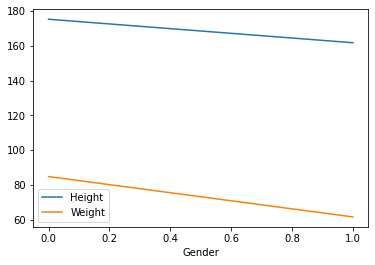

In [25]:
dataweightheight.groupby('Gender').mean().plot()

# Exploratory data analysis of quantitative variables

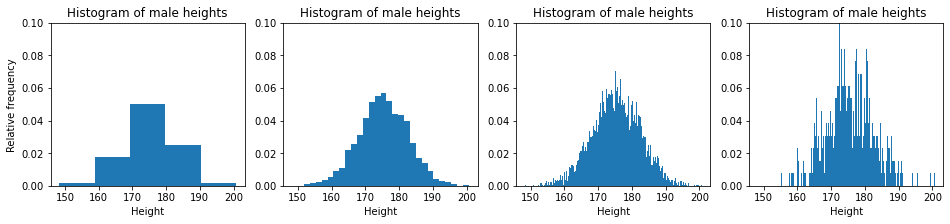

In [56]:
bins = [5, 30, 200, 2000]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3))

maskmale = (dataweightheight.loc[:,"Gender"] == 0)
for ax, i in zip(axes, range(4)):
    ax.hist(dataweightheight.loc[maskmale,"Height"].values, bins[i], density=True);
    ax.set_ylim([0,0.1])
    ax.set_xlabel('Height')
    if i==0:
        ax.set_ylabel('Relative frequency')
    ax.set_title('Histogram of male heights');

***
What is going on?
***

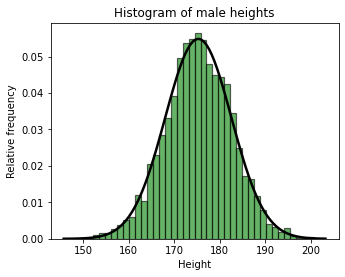

In [57]:
#
fig = plt.figure(figsize=(4, 3)) # create figure object with a (width,height)
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot histogram of data
axes.hist(dataweightheight.loc[maskmale,"Height"].values, 40, density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1.2);
axes.set_xlabel('Height')
axes.set_ylabel('Relative frequency')
axes.set_title('Histogram of male heights');

# Plot a normal distribution on top
import scipy.stats as stats
mu, sigma = stats.norm.fit(dataweightheight.loc[maskmale,"Height"].values)

xmin, xmax = axes.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
axes.plot(x, p, 'k', linewidth=2.5);

In [58]:
mu, sigma

(175.32691860179227, 7.272212730423626)

In [59]:
# Interactive version
from ipywidgets import interact
import ipywidgets as widgets

def plot_func(bins):
    fig = plt.figure(figsize=(4, 3)) # create figure object with a (width,height)
    axes = fig.add_axes([0, 0, 1, 1])
    axes.hist(dataweightheight.loc[maskmale,"Height"].values, int(bins), density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1);
    axes.set_ylim([0,0.06])
    axes.set_xlabel('Height')
    axes.set_ylabel('Relative frequency')
    axes.set_title('Histogram of male heights');
    axes.plot(x, p, 'k', linewidth=2.5);

interact(plot_func, bins = widgets.FloatSlider(value=3, min=3, max=40, step=1));

interactive(children=(FloatSlider(value=3.0, description='bins', max=40.0, min=3.0, step=1.0), Output()), _dom…

We plotted a normal distribution on top. Visually it looks like a good fit. Play around with the bins.

This normal distribution has two parameters: the mean mu and standard deviation sigma.
They completely determine the shape of the whole curve.

Play around with different spreads. The area under the whole curve always has to be 1.

In [63]:
# Interactive version
from ipywidgets import interact
import ipywidgets as widgets

def plot_func(sigma):
    fig = plt.figure(figsize=(4, 3)) 
    axes = fig.add_axes([0, 0, 1, 1])
    p = stats.norm.pdf(x, mu, sigma)
    axes.plot(x, p, 'k', linewidth=2.5);
    axes.set_ylim([0,0.12])
    axes.set_xlim([x.min(),x.max()])
    axes.set_xlabel('Height')
    axes.set_ylabel('Relative frequency')
    axes.set_title('Model of male heights with different spreads');
    
interact(plot_func, sigma = widgets.FloatSlider(value=7, min=1, max=12, step=0.5));

interactive(children=(FloatSlider(value=7.0, description='sigma', max=12.0, min=1.0, step=0.5), Output()), _do…

## Q-Q plots

In [64]:
import statsmodels.api as sm  # For the Q-Q plot
import scipy.stats as stats  # For generating random data and for fitting

Let's check if the male heights are normally distributed:

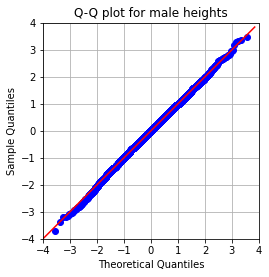

In [65]:
#
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
sm.qqplot(dataweightheight.loc[maskmale,"Height"].values, stats.norm, fit=True, line='45',ax=axes)
# fit=True just means that the quantiles are formed from the standardized data

# Few commands to make the plot look nicer:
axes.set_ylim([-4,4]); axes.set_xlim([-4,4])
axes.set_xticks(axes.get_yticks()); axes.grid()
axes.set_title("Q-Q plot for male heights");

All the points lie on the straight line, so the normal distribution is a good assumption.

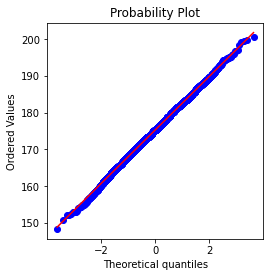

In [67]:
# Alternatively, use scipy.stats.probplot

fig = plt.figure(figsize=(3, 3)) # create figure object with a (width,height)
axes = fig.add_axes([0, 0, 1, 1])
stats.probplot(dataweightheight.loc[maskmale,"Height"], dist='norm', plot=axes);

## Random data

We now generate a new data set of 500 "alien heights" that is unimodal and symmetric to test normality. Notice anything particular when you scroll through the data?

In [68]:
np.random.seed(seed=6)
#https://en.wikipedia.org/wiki/Cauchy_distribution
dataalienheights = stats.cauchy.rvs(loc=175, scale=6.7, size=514) 
dataalienheights = dataalienheights[dataalienheights > 100]

print(dataalienheights.mean())
dataalienheights

183.06632514293574


array([ 194.14808047,  171.09367286,  185.64817238,  124.14543428,
        155.95119106,  177.0623888 ,  175.62945805,  173.25294963,
        171.18975683,  177.71425553,  173.68131689,  181.13055708,
        175.38004933,  176.6946823 ,  178.29156931,  393.09174254,
        185.54712207,  173.12632198,  191.35919982,  185.83836252,
        136.23296733,  180.49457693,  184.35525286,  181.15087237,
        180.16784299,  175.86644859,  158.79946409,  225.05762961,
        172.89856642,  166.74129245,  180.44681673,  543.13433621,
        168.53226443,  178.99966149,  177.15385211,  180.44878522,
        208.60015915,  171.63402424,  168.45126544,  172.88043169,
        181.55469744,  180.6885908 ,  172.96430814,  375.73958374,
        173.94959441,  172.19533928,  180.18454316,  149.7175381 ,
        172.78511117,  182.64219241,  182.35164185,  169.59275605,
        165.1106841 ,  174.39322023,  171.17297486,  181.08634407,
        165.08151617,  171.06893424,  187.58026323,  177.53229

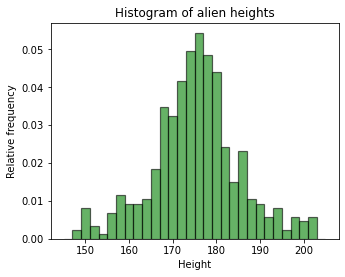

In [69]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

# Plot histogram of data
axes.hist(dataalienheights, 30, range=(145,205), density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1.2);
axes.set_xlabel('Height')
axes.set_ylabel('Relative frequency')
axes.set_title('Histogram of alien heights');

Looks like this could be a normal distribution. To make sure let's check the Q-Q plot.

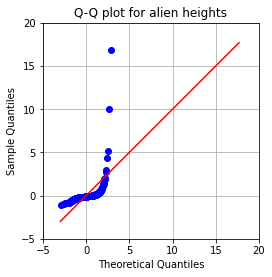

In [71]:
fig = plt.figure(figsize=(3, 3)) # create figure object with a (width,height)
axes = fig.add_axes([0, 0, 1, 1])
sm.qqplot(dataalienheights, stats.norm, fit=True, line='45',ax=axes);

# Few commands to make the plot look nicer:
axes.set_ylim([-5,20]); axes.set_xlim([-5,20])
axes.grid()
axes.set_title("Q-Q plot for alien heights");

This is definitely not a normal distribution!

If we remove the "outliers" it is still a bad fit:

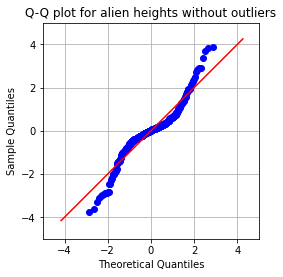

In [72]:
fig = plt.figure(figsize=(3, 3)) # create figure object with a (width,height)
axes = fig.add_axes([0, 0, 1, 1])
sm.qqplot(dataalienheights[dataalienheights<250], stats.norm, fit=True, line='45',ax=axes);

# Few commands to make the plot look nicer:
axes.set_ylim([-5,5]); axes.set_xlim([-5,5])
axes.grid()
axes.set_title("Q-Q plot for alien heights without outliers");

If you had a normal distribution with outliers, this would be different:

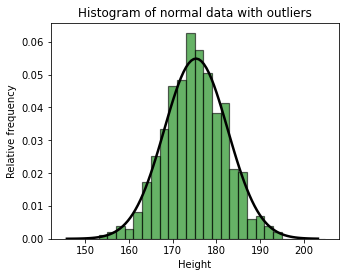

In [73]:
#
datanormalwithoutliers = np.append(np.random.normal(mu, sigma, 495), [260,300,400,600,700]);
fig = plt.figure(figsize=(4, 3)) 
axes = fig.add_axes([0, 0, 1, 1]) 

# Plot histogram of data
axes.hist(datanormalwithoutliers, 30, range=(145,205), density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1.2);
axes.set_xlabel('Height')
axes.set_ylabel('Relative frequency')
axes.set_title('Histogram of normal data with outliers');

# Plot a normal distribution on top
axes.plot(x, p, 'k', linewidth=2.5);

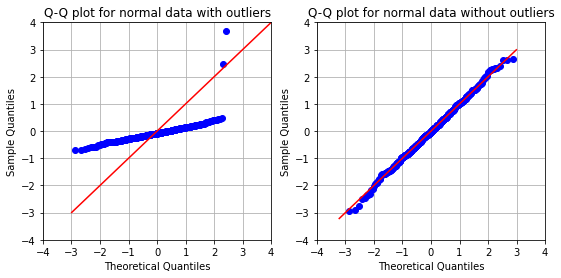

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

axes[0].set_title("Q-Q plot for normal data with outliers");
sm.qqplot(datanormalwithoutliers, stats.norm, fit=True, line='45',ax=axes[0]);

axes[1].set_title("Q-Q plot for normal data without outliers");
sm.qqplot(datanormalwithoutliers[datanormalwithoutliers < 230], stats.norm, fit=True, line='45',ax=axes[1]);

# Few commands to make the plot look nicer:
for ax in axes:
    ax.set_ylim([-4,4]); ax.set_xlim([-4,4])
    ax.set_xticks(ax.get_yticks()); ax.grid()

# sample variability

In [77]:
dataweightheight.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


Let's get the heights of females this time.

In [78]:
dataweightheight[dataweightheight.Gender==1].describe()

,Gender,Height,Weight
count,5000.0,5000.000000,5000.000000
mean,1.0,63.708774,135.860093
std,0.0,2.696284,19.022468
min,1.0,54.263133,64.700127
25%,1.0,61.894441,122.934096
50%,1.0,63.730924,136.117583
75%,1.0,65.563565,148.810926
max,1.0,73.389586,202.237214


For females, if we resamle $n=100$ data, what's the average height?

In [79]:
n = 100
means = []
repetitions = 10000

female_height = dataweightheight.loc[dataweightheight.Gender==1, "Height"].values

for i in np.arange(repetitions):
    sample_female_height = np.random.choice(female_height, n, replace=True)
    means.append(np.mean(sample_female_height))

means = np.array(means)

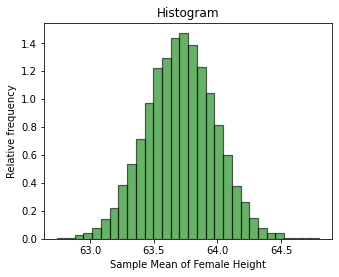

In [80]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) 

# Plot histogram of data
axes.hist(means, 30, density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1.2);
axes.set_xlabel('Sample Mean of Female Height')
axes.set_ylabel('Relative frequency')
axes.set_title('Histogram');


In [81]:
n = 1000
means2 = []
repetitions = 10000

female_height = dataweightheight.loc[dataweightheight.Gender==1, "Height"].values

for i in np.arange(repetitions):
    sample_female_height = np.random.choice(female_height, n, replace=True)
    means2.append(np.mean(sample_female_height))

means2 = np.array(means2)

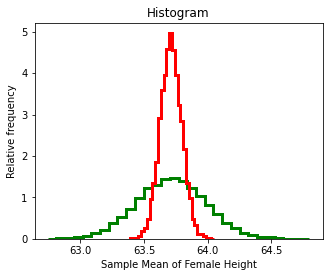

In [82]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) 

# Plot histogram of data
axes.hist(means, 30, density=True, edgecolor='g', linewidth=3, histtype="step");
axes.hist(means2, 30, density=True, edgecolor='r', linewidth=3, histtype="step");

axes.set_xlabel('Sample Mean of Female Height')
axes.set_ylabel('Relative frequency')
axes.set_title('Histogram');

# The end

**Source**

This notebook was adapted from:
* Introduction to data science by Michael Szell
* Data 8: The Foundations of Data Science
* Data 100: Principles and Techniques of Data Science
